In [28]:
from mysql.connector import errorcode
import mysql.connector as mysql
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import plotly.express as px
from os import listdir 
import pandas as pd
import numpy as np

In [4]:
# Configuração da conexão com o banco de dados
config = {
  'user': 'root',
  'password': 'gogu7894',
  'host': 'localhost',
  'database': 'csgo'
}

# Conexão com o banco de dados
cnx = mysql.connect(**config)

In [5]:
# Conexão com o banco de dados
cnx = mysql.connect(**config)

# Criação do cursor
cursor = cnx.cursor()

# Consulta para selecionar todos os dados da tabela
query_players = "SELECT * FROM players"
query_picks = "SELECT * FROM picks"
query_economy = "SELECT * FROM economy"
query_results = "SELECT * FROM results"

# Execução da consulta
cursor.execute(query_players)

# Obtenção dos resultados
players = cursor.fetchall()

# Obtenção dos nomes das colunas
col_names_players = [desc[0] for desc in cursor.description]

# Execução da consulta
cursor.execute(query_picks)

# Obtenção dos resultados
picks = cursor.fetchall()

# Obtenção dos nomes das colunas
col_names_picks = [desc[0] for desc in cursor.description]

# Execução da consulta
cursor.execute(query_economy)

# Obtenção dos resultados
economy = cursor.fetchall()

# Obtenção dos nomes das colunas
col_names_economy = [desc[0] for desc in cursor.description]

# Execução da consulta
cursor.execute(query_results)

# Obtenção dos resultados
results = cursor.fetchall()

# Obtenção dos nomes das colunas
col_names_results = [desc[0] for desc in cursor.description]

# Fechamento do cursor e da conexão
cursor.close()
cnx.close()

In [6]:
# Conversão dos resultados em um DataFrame do Pandas
df_players = pd.DataFrame(players, columns=col_names_players)
df_picks = pd.DataFrame(picks, columns=col_names_picks)
df_economy = pd.DataFrame(economy, columns=col_names_economy)
df_results = pd.DataFrame(results, columns=col_names_results)

In [7]:
display(df_results)

,Date_,team_1,team_2,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner
0,2020-03-18,Recon 5,TeamOne,Dust2,0,16,2,2,0,1,0,15,5151,2340454,62,63,0,2,2\r
1,2020-03-18,Recon 5,TeamOne,Inferno,13,16,2,2,8,6,5,10,5151,2340454,62,63,0,2,2\r
2,2020-03-18,New England Whalers,Station7,Inferno,12,16,2,1,9,6,3,10,5243,2340461,140,118,12,16,2\r
3,2020-03-18,Rugratz,Bad News Bears,Inferno,7,16,2,2,0,8,7,8,5151,2340453,61,38,0,2,2\r
4,2020-03-18,Rugratz,Bad News Bears,Vertigo,8,16,2,2,4,5,4,11,5151,2340453,61,38,0,2,2\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45768,2015-11-05,G2,E-frag.net,Inferno,13,16,2,1,8,7,5,9,1970,2299059,7,16,1,2,2\r
45769,2015-11-05,G2,E-frag.net,Dust2,16,13,1,1,10,5,6,8,1970,2299059,7,16,1,2,2\r
45770,2015-11-04,CLG,Liquid,Inferno,16,12,1,1,7,8,9,4,1934,2299011,10,14,16,12,1\r
45771,2015-11-03,NiP,Dignitas,Train,16,4,1,2,4,1,12,3,1934,2299001,6,12,16,4,1\r


In [8]:
df_results.info() #Verificar as informações sobre as variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45773 entries, 0 to 45772
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date_         45773 non-null  object
 1   team_1        45773 non-null  object
 2   team_2        45773 non-null  object
 3   _map          45773 non-null  object
 4   result_1      45773 non-null  int64 
 5   result_2      45773 non-null  int64 
 6   map_winner    45773 non-null  object
 7   starting_ct   45773 non-null  object
 8   ct_1          45773 non-null  int64 
 9   t_2           45773 non-null  int64 
 10  t_1           45773 non-null  int64 
 11  ct_2          45773 non-null  int64 
 12  event_id      45773 non-null  int64 
 13  match_id      45773 non-null  int64 
 14  rank_1        45773 non-null  int64 
 15  rank_2        45773 non-null  int64 
 16  map_wins_1    45773 non-null  int64 
 17  map_wins_2    45773 non-null  int64 
 18  match_winner  45773 non-null  object
dtypes: i

In [9]:
display(df_results.isna().sum()) #Verificar a presença de valores ausentes.

Date_           0
team_1          0
team_2          0
_map            0
result_1        0
result_2        0
map_winner      0
starting_ct     0
ct_1            0
t_2             0
t_1             0
ct_2            0
event_id        0
match_id        0
rank_1          0
rank_2          0
map_wins_1      0
map_wins_2      0
match_winner    0
dtype: int64

<h2>Mapa seja mais favorável para CT</h2>

<p>Para analiar qual dos mapas é mais favoráveis para CT(Counter Terrorist), determinei essa característica calculando as pontuações médias obtidas em cada lado do mapas e, em seguida, comparando ambos os lados.</p>


In [10]:
maps = ['Cache','Cobblestone','Dust2','Inferno','Mirage','Nuke','Overpass','Train','Vertigo']

ct_1 = df_results[['Date_','_map','ct_1']].rename(columns={'ct_1':'ct'})
ct_2 = df_results[['Date_','_map','ct_2']].rename(columns={'ct_2':'ct'})

ct = pd.concat((ct_1, ct_2))

t_1 = df_results[['Date_','_map','t_1']].rename(columns={'t_1':'t'})
t_2 = df_results[['Date_','_map','t_2']].rename(columns={'t_2':'t'})

t = pd.concat((t_1, t_2))

t = t.sort_values('Date_')
ct = ct.sort_values('Date_')

series_t, series_ct, how_ct = {},{},{}

for i, key in enumerate(maps):
    t_map = t[t._map == maps[i]]
    ct_map = ct[ct._map == maps[i]]
    y_t = t_map.t.rolling(min_periods = 20, window= 200, center=True).sum().values
    y_ct = ct_map.ct.rolling(min_periods = 20, window= 200, center=True).sum().values
    
    series_t[key] = pd.Series(data=y_t,index=t_map.Date_)
    series_ct[key] = pd.Series(data=y_ct,index=ct_map.Date_)
    
    how_ct[key] = series_ct[key]/(series_ct[key]+series_t[key])//0.001/10
    
fig = go.Figure()

for _map in maps:
    fig.add_trace(go.Scatter(x=how_ct[_map].index, y=how_ct[_map].values, name=_map))
    
fig.add_trace(go.Scatter(x=['2015-11-01', '2020-03-12'], y=[50,50], mode='lines',line=dict(color='grey'),showlegend=False))
fig.update_layout(title='Distribuição de rodadas entre os lados CT e T.', yaxis_title='Porcentagem de rodadas vencidas no lado CT (%)')
fig.show()

<p>Existem longos períodos sem dados para um mapa no gráfico. Isso ocorre porque os mapas são adicionados e removidos constantemente pelos administradores do jogo.

observando os graficos o Nuke e Train oscilam como sendo os mapas mais favoráveis ao lado CT, tendo uma aprocimação de 57% das rodadas vencidas pelo lado CT, enquanto Dust2 e Cache são historicamente os mapas mais favoráveis ao lado T.</p>

<img src="Comparação_mapas_Nuke_Train.png">

<p>interessante em 2019 no mês abril o mapa Vertigo entrou no jogo tendo somente 4 meses, após o Cache foi removido do jogo.</p>

<img src="Comparação_mapas_Cache_Vertigo.png">

<p>É interessante observar que o Inferno era conhecido por ser um mapa fortemente favorável ao lado CT antes de 2016, o que foi uma das razões para sua atualização. Desde sua atualização, Inferno tem sido na verdade o mapa mais equilibrado nesse aspecto.</p>

<img src="Comparação_mapas_Cache_Inferno.png">

<h1>Sobre os mapas:</h1>

<p>Mirage, Train, Inferno e Overpass são os mapas dos quais temos mais dados disponíveis. Eles também são os mapas presentes ao decorrer tempo;

Cache, Cobblestone e Dust2 foram menos jogados, mas também estiveram fora por longos períodos de tempo:

Vertigo tem dados limitados disponíveis, pois foi o mapa mais recentemente adicionado à pool de mapas.</p>

In [11]:
df_results.groupby('_map').Date_.count()

_map
Cache          4613
Cobblestone    3513
Default          21
Dust2          4114
Inferno        7485
Mirage         9021
Nuke           4206
Overpass       5625
Train          6566
Vertigo         609
Name: Date_, dtype: int64

<p>No CS:GO, os torneios mais respeitáveis são os Majors. Esses torneios são normalmente jogados duas vezes por ano e têm uma premiação de $1.000.000. Para a próxima analise, discretizar a coluna 'data' em um dataframe em uma coluna 'periodo_tempo'. Essa nova coluna se referirá ao torneio Major até 2019. </p>

In [12]:
majors = [{'tournament':'01. Cluj-Napoca 2015','start_date':'2015-10-28'},
          {'tournament':'02. Columbus 2016','start_date':'2016-03-29'},
          {'tournament':'03. Cologne 2016','start_date':'2016-07-05'},
          {'tournament':'04. Atlanta 2017','start_date':'2017-01-22'},
          {'tournament':'05. Krakow 2017','start_date':'2017-07-16'},
          {'tournament':'06. Boston 2018','start_date':'2018-01-26'},
          {'tournament':'07. London 2018','start_date':'2018-09-20'},
          {'tournament':'08. Katowice 2019','start_date':'2019-02-28'},
          {'tournament':'09. Berlin 2019','start_date':'2019-09-05'}]


def create_col_time_period(df):
    
    list_ =  df.columns
    for row in list_:
        if row == 'time_period':
            print('existe')
        else:
            df['time_period'] = None
    
    for major_start in majors:
        df.loc[(df['Date_']>=major_start['start_date']), 'time_period'] = major_start['tournament']
    return df

In [13]:
df_results = create_col_time_period(df_results)
df_economy = create_col_time_period(df_economy)
df_picks = create_col_time_period(df_picks)
df_players = df_players.merge(df_results[['match_id','time_period']],'left',on='match_id')




In [14]:
results_df_team_1 = df_results[['time_period','team_1','_map','ct_1','t_2','ct_2','t_1']
                      ].rename(columns={'team_1':'team'})
results_df_team_2 = df_results[['time_period','team_2','_map','ct_1','t_2','ct_2','t_1']
                      ].rename(columns={'team_2':'team'})
results_df_teams = pd.concat((results_df_team_1,results_df_team_2))[['time_period','team','_map']]

In [15]:
gb = results_df_teams.groupby(['time_period','_map']).team.count()
gb_text = round(gb*100/gb.groupby('time_period').sum(),1).reset_index().rename(columns={'team':'percentage'}) # type: ignore
gb_text.percentage = gb_text.percentage.astype(str)+'%'
gb = gb.reset_index()

In [16]:
fig = go.Figure()
for _map in maps:
    fig.add_bar(name=_map,x=gb[gb._map==_map].time_period,y=gb[gb._map==_map].team, # type: ignore
                text=gb_text[gb_text._map==_map].percentage,textposition='inside') 

fig.update_layout(barmode='stack',legend=dict(traceorder='normal'),yaxis_title='Número de mapas jogados',font=dict(size=10))
fig.show()

<p>Como mencionado anteriormente, Nuke é historicamente o mapa menos popular do pool. Isso vem mudando recentemente, já que equipes que costumavam banir permanentemente o mapa passaram a banir mapas como Vertigo. Vertigo, como o mapa mais novo e não convencional, também é o mapa mais impopular, provavelmente devido às muitas mudanças que teve em seu curto período competitivo.</p>
<img src="ban_de_mapas.png">

<p>O período entre Columbus e Cologne 2016 teve a menor quantidade de mapas jogados e também foi o mais curto (menos de 4 meses), enquanto o período entre Boston e London 2018 teve a maior quantidade de mapas jogados e também foi o mais longo (mais de 7 meses).</p>
<img src="mapas.png">

In [17]:
results_df_team_1_ct = results_df_team_1.rename(columns={'ct_1':'ct_team','t_2':'t_opponent'}).drop(columns=['ct_2','t_1'])
results_df_team_2_ct = results_df_team_2.rename(columns={'ct_2':'ct_team','t_1':'t_opponent'}).drop(columns=['ct_1','t_2'])
results_df_ct = pd.concat((results_df_team_1_ct,results_df_team_2_ct),sort=True)


results_df_team_1_t = results_df_team_1.rename(columns={'t_1':'t_team','ct_2':'ct_opponent'}).drop(columns=['ct_1','t_2'])
results_df_team_2_t = results_df_team_2.rename(columns={'t_2':'t_team','ct_1':'ct_opponent'}).drop(columns=['ct_2','t_1'])
results_df_t = pd.concat((results_df_team_1_t,results_df_team_2_t),sort=True)

results_df_ct['side_diff'] = results_df_ct['ct_team']- results_df_ct['t_opponent']
results_df_ct['side_sum'] = results_df_ct['ct_team']+results_df_ct['t_opponent']

results_df_t['side_diff'] = results_df_t['t_team']-results_df_t['ct_opponent']
results_df_t['side_sum']  = results_df_t['t_team'] +results_df_t['ct_opponent']

In [18]:
def groupby_time_map_team(results_df_side):
    gb = results_df_side.groupby(['time_period','_map','team'])[['side_diff','side_sum']].sum()
    gb['side_diff_per_game'] = gb['side_diff']/(gb['side_sum']/15)
    gb = gb.sort_values(['time_period','_map','side_diff_per_game'],ascending=[1,1,0])

    for major in majors:
        col = major['tournament']
        _filter = (gb.side_sum > gb.loc[col].side_sum.mean()*3/4)
        gb.loc[col] = gb.loc[_filter][gb.loc[_filter].index.get_level_values(0)==col]

    gb.dropna(inplace=True)    

    return gb

In [37]:
gb_ct = groupby_time_map_team(results_df_ct)
gb_t = groupby_time_map_team(results_df_t)

new_data_ct = pd.DataFrame(data=results_df_ct)
new_data_ct.reset_index()
display(new_data_ct)

,_map,ct_team,t_opponent,team,time_period,side_diff,side_sum
0,Dust2,0,1,Recon 5,09. Berlin 2019,-1,1
1,Inferno,8,6,Recon 5,09. Berlin 2019,2,14
2,Inferno,9,6,New England Whalers,09. Berlin 2019,3,15
3,Inferno,0,8,Rugratz,09. Berlin 2019,-8,8
4,Vertigo,4,5,Rugratz,09. Berlin 2019,-1,9
...,...,...,...,...,...,...,...
45768,Inferno,9,5,E-frag.net,01. Cluj-Napoca 2015,4,14
45769,Dust2,8,6,E-frag.net,01. Cluj-Napoca 2015,2,14
45770,Inferno,4,9,Liquid,01. Cluj-Napoca 2015,-5,13
45771,Train,3,12,Dignitas,01. Cluj-Napoca 2015,-9,15


<p>classificar as melhores equipes em cada mapa e em cada lado (CT e T) para cada período de tempo.</p>

In [20]:
def plot_ranking_teams_sides(gb):
    rankings_teams = {}
    for _map in maps:
        rankings_teams[_map] = pd.DataFrame(index=range(1,6),)
        rankings_teams[_map].index.name = 'ranking'
        rankings_teams[_map].style.set_caption(_map)

        for major in majors:
            col = major['tournament']
            try:
                rankings_teams[_map][col] = gb.loc[col,_map]['side_diff_per_game'][:5].index
            except:
                pass
            
        print('\n'+_map+':')
        display(rankings_teams[_map])
 

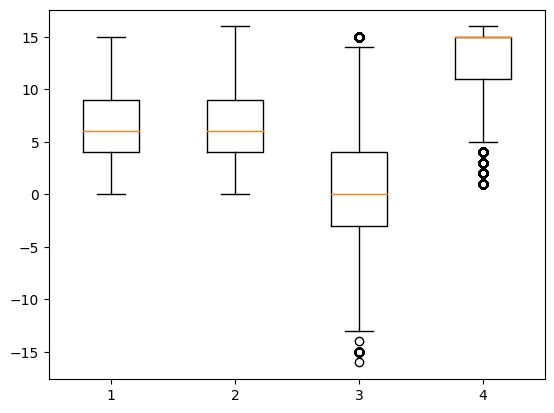

In [39]:
fig, ax = plt.subplots()
ax.boxplot(new_data_ct[['ct_team', 't_opponent', 'side_diff','side_sum']])
ax.set_ylabel('')

plt.show()


In [41]:

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


row_colums = ['_map','ct_team','team']
df_no = new_data_ct[row_colums]

display(df_no)

df_cat = df_no.apply(OrdinalEncoder().fit_transform) #substitui as colunas originais pelas colunas codificadas


# Separar os atributos preditores (X) do alvo (y)
X = df_cat.drop('side_sum', axis=1)
y = df_cat['side_sum']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar as variáveis preditoras
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Treinar um modelo de Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Fazer previsões no conjunto de teste usando o modelo de Naive Bayes
y_pred_nb = nb.predict(X_test)

# Fazer as previsões nos dados de teste
y_pred = nb.predict(X_test)

# Avaliar o desempenho do  modelo de Naive Bayes
print('Acurácia:', accuracy_score(y_test, y_pred))
print('Matriz de confusão:')
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred, target_names=['Not ', 'per_game']))


,_map,ct_team,team
0,Dust2,0,Recon 5
1,Inferno,8,Recon 5
2,Inferno,9,New England Whalers
3,Inferno,0,Rugratz
4,Vertigo,4,Rugratz
...,...,...,...
45768,Inferno,9,E-frag.net
45769,Dust2,8,E-frag.net
45770,Inferno,4,Liquid
45771,Train,3,Dignitas


ValueError: Expected 2D array, got 1D array instead:
array=['Dust2' 'Inferno' 'Inferno' ... 'Inferno' 'Train' 'Cobblestone'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
print('T-side Rankings:\n')
plot_ranking_teams_sides(gb_t)

T-side Rankings:


Cache:


,01. Cluj-Napoca 2015,02. Columbus 2016,03. Cologne 2016,04. Atlanta 2017,05. Krakow 2017,06. Boston 2018,07. London 2018,08. Katowice 2019
ranking,,,,,,,,
1,NiP,CSGL,Luminosity,North Academy,INTZ,Athletico,ALTERNATE aTTaX,Vitality
2,fnatic,TYLOO,Bpro,Nexus,Kings,Malvinas,INTZ,FURIA
3,Liquid,mousesports,Born Of Fire,Blight,Renegades,NOBO,DETONA,fnatic
4,Renegades,BigGods,Millenium,ALTERNATE aTTaX,Immortals,3DMAX,Imperial,Luminosity
5,Epsilon,Innova,K23,Space Soldiers,Space Soldiers,Property,Valiance,Epsilon



Cobblestone:


,01. Cluj-Napoca 2015,02. Columbus 2016,03. Cologne 2016,04. Atlanta 2017,05. Krakow 2017,06. Boston 2018
ranking,,,,,,
1,MVP.karnal,CPH Wolves,Bravado,Recca,Keyd,FURIA
2,Preparation,Liquid,Parallax,SK,Squared,Space Soldiers
3,Tempo Storm,Tempo Storm,Renegades,Chiefs,SK,pro100
4,Torpedo,Alpha,g3x,Space Soldiers,undefined,Grayhound
5,Epsilon,fnatic,K23,LOG,AVANGAR,MVP PK



Dust2:


,01. Cluj-Napoca 2015,02. Columbus 2016,03. Cologne 2016,04. Atlanta 2017,06. Boston 2018,07. London 2018,08. Katowice 2019,09. Berlin 2019
ranking,,,,,,,,
1,LDLC White,MK,NRG,BIG,Yeah,Grayhound,MVP PK,Bad News Bears
2,fnatic,LDLC,Gambit,iGame.com,Imperial,Swole Patrol,Beyond,Lucid Dream
3,RCTIC,Selfless,Exile5,Copenhagen Flames,ENCE,Red Reserve,Lazarus,BOOT
4,mousesports,Luminosity,TheMongolz,Vexilla,Rogue,TNC,Keyd,Grayhound
5,Cloud9,Phenomenon,TYLOO,RuSh3D,Renegades,Bpro,Ignis,mousesports



Inferno:


,01. Cluj-Napoca 2015,02. Columbus 2016,04. Atlanta 2017,05. Krakow 2017,06. Boston 2018,07. London 2018,08. Katowice 2019,09. Berlin 2019
ranking,,,,,,,,
1,Gambit,GODSENT,HAVU,Dark Sided,Splyce,Swole Patrol,ex-Fragsters,Gen.G
2,OpTic,Echo Fox,NRG,ex-Outlaws,CyberZen,Movistar Riders,slashLEVEL,Bad News Bears
3,TSM,E-frag.net,Bee's Money Crew,LFAO,Grayhound,Tainted Minds,Gambit Youngsters,INTZ
4,CPH Wolves,FaZe,Signature,Endpoint,VG.Flash,The Fundamentals,The Quest,Gambit Youngsters
5,Tempo Storm,CPH Wolves,EPG,Keyd,Valiance,OpTic,ORDER,Grayhound



Mirage:


,01. Cluj-Napoca 2015,02. Columbus 2016,03. Cologne 2016,04. Atlanta 2017,05. Krakow 2017,06. Boston 2018,07. London 2018,08. Katowice 2019,09. Berlin 2019
ranking,,,,,,,,,
1,TSM,GameAgents,EYESports,dreamchasers,Not Academy,Tempo Storm,MVP PK,DETONA,Liquid
2,Arcade,Astralis,XPC,CLG,Tainted Minds,Rise Nation,Bpro,cats,Absolute
3,Epsilon,Immortals,EHOME,Mineski,passions,Japaleno,Natus Vincere,Liquid,District 7
4,MVP.karnal,Arcade,Millenium,Enigma6,MANS NOT HOT,FURIA Inagame,Vision,FURIA,SYF
5,Ancient,XPC,g3x,Born Of Fire,Kings,Chiefs,OpTic,Syman,TYLOO



Nuke:


,03. Cologne 2016,04. Atlanta 2017,05. Krakow 2017,06. Boston 2018,07. London 2018,08. Katowice 2019,09. Berlin 2019
ranking,,,,,,,
1,NiP,ViCi,WASD,Astralis,MVP PK,Grayhound,Under 21
2,Athletico,New4,FRENCH CANADIANS,Vision,Astralis,Defusekids,ViCi
3,Gambit,North Academy,NRG,OpTic,Beyond,ViCi,Bad News Bears
4,dream[S]cape,Nexus,MVP PK,Gorilla Gang,FURIA,New Identity,Brute
5,Liquid,MVP PK,Valiance,Nemiga,Wild,Astralis,Grayhound



Overpass:


,01. Cluj-Napoca 2015,02. Columbus 2016,03. Cologne 2016,04. Atlanta 2017,05. Krakow 2017,06. Boston 2018,07. London 2018,08. Katowice 2019,09. Berlin 2019
ranking,,,,,,,,,
1,OpTic,Virtus.pro,K23,FRENCH CANADIANS,New4,Wind and Rain,Vitality,Isurus,New Identity
2,?,G2,Outlaws,1337,AGO,VG.Flash,TYLOO,eUnited,Triumph
3,Ancient,TYLOO,MK,Born Of Fire,SK,NRG,Red Reserve,ATK,Peeker's Advantage
4,Astralis,OpTic,Tengri,paiN,MK,Flash,Bpro,Liquid,FURIA
5,TSM,HellRaisers,ArchAngels,Team123,Naventic,Grayhound,Syman,Just Swing,TYLOO



Train:


,01. Cluj-Napoca 2015,02. Columbus 2016,03. Cologne 2016,04. Atlanta 2017,05. Krakow 2017,06. Boston 2018,07. London 2018,08. Katowice 2019,09. Berlin 2019
ranking,,,,,,,,,
1,NiP,FaZe,iGame.com,glassysky,HellRaisers,5POWER,ORDER,Bpro,Orgless
2,fnatic,g3x,Parallax,TeamOne,Flash,Squared,Imperial,Grayhound,ex-Genuine
3,FlipSid3,fnatic,Cloud9,LOG,Kings,AVANGAR,CyberZen,Singularity,R-Stars
4,Vexed,Liquid,Renegades,ViCi,Natus Vincere,HOLLYWOOD,Renegades,Imperial,TYLOO
5,Luminosity,AGG,SK,passions,Windigo,Fragsters,Astralis,NRG,Paradox



Vertigo:


,08. Katowice 2019,09. Berlin 2019
ranking,,
1,Liquid,ORDER
2,Gambit Youngsters,GODSENT
3,Movistar Riders,Keyd
4,Singularity,North
5,ALTERNATE aTTaX,ARCY


In [ ]:
print('CT-side Rankings:\n')
plot_ranking_teams_sides(gb_ct)

CT-side Rankings:


Cache:


,01. Cluj-Napoca 2015,02. Columbus 2016,03. Cologne 2016,04. Atlanta 2017,05. Krakow 2017,06. Boston 2018,07. London 2018,08. Katowice 2019
ranking,,,,,,,,
1,Area08 fe,Tempo Storm,Winterfox,Enigma6,Vault,Torqued,Ghost,INTZ
2,Enemy,G2,Astralis,Dignitas,SIN,Rise Nation,Chiefs,G2
3,LDLC White,E-frag.net,g3x,5POWER,UYA,Tricked,Swole Patrol,Vitality
4,Cloud9,g3x,Kinguin,TeamOne,Gambit,ORDER,AVANGAR,AVANGAR
5,fnatic,Arcade,TheMongolz,paiN,HAVU,PAPERPLANES,TeamOne,ALTERNATE aTTaX



Cobblestone:


,01. Cluj-Napoca 2015,02. Columbus 2016,03. Cologne 2016,04. Atlanta 2017,05. Krakow 2017,06. Boston 2018
ranking,,,,,,
1,Space Soldiers,VG.CyberZen,X,North Academy,Naventic,FURIA
2,noKappa,INTZ,Immortals,Recca,Legacy,SK
3,fnatic,PRIDE,MVP Project,G2,Masterminds,Bpro
4,Platinium,BigGods,Cloud9,Alpha,ViCi,Royal Bandits
5,Luminosity,Cloud9,Kinguin,Imperial,Red Reserve,DIVIZON



Dust2:


,01. Cluj-Napoca 2015,02. Columbus 2016,03. Cologne 2016,06. Boston 2018,07. London 2018,08. Katowice 2019,09. Berlin 2019
ranking,,,,,,,
1,Astralis,TYLOO,LDLC,BIG,Swole Patrol,Chiefs,Divine
2,dream[S]cape,Natus Vincere,g3x,Astralis,Astralis,Cloud9,Riot Squad
3,Games Academy,eXtatus,FIVE,TYLOO,Grayhound,Thunder Logic,TeamOne
4,Cloud9,ALTERNATE aTTaX,iNation,Mythic,NoChance,Grayhound,AVANT
5,E-frag.net,Echo Fox,Signature,ORDER,DreamEaters,eUnited,ORDER



Inferno:


,01. Cluj-Napoca 2015,02. Columbus 2016,04. Atlanta 2017,05. Krakow 2017,06. Boston 2018,07. London 2018,08. Katowice 2019,09. Berlin 2019
ranking,,,,,,,,
1,k1ck,VG.CyberZen,HAVU,Movistar Riders,Grayhound,Alpha Red,Inflames,Yeah
2,Ancient,Tricked,Tainted Minds,eSuba,MIBR,Signature,Unicorns of Love,Ze Pug Godz
3,Enemy,Natus Vincere,PENTA,ViCi,Pompa,Astralis,Valiance,Liquid
4,fnatic,GODSENT,ACG,FaZe,Astralis,Chiefs,Chris and the boys,Grayhound
5,Renegades,Dignitas,GODSENT,Kings,Liquid,Vitality,Astralis,BOOM



Mirage:


,01. Cluj-Napoca 2015,02. Columbus 2016,03. Cologne 2016,04. Atlanta 2017,05. Krakow 2017,06. Boston 2018,07. London 2018,08. Katowice 2019,09. Berlin 2019
ranking,,,,,,,,,
1,TYLOO,Space Soldiers,Brewtopia,Mythic,Entity,Fierce Tiger,GUNRUNNERS,SYF,Chiefs
2,Arcade,Astralis,nxl,Imperial,Nexus,Endpoint,Tainted Minds,Athletico,ATK
3,Natus Vincere,Luminosity,Cloud9,Recca,Ghost Academy,Não Tem Como,ex-Fragsters,fnatic,ORDER
4,FaZe,VG.CyberZen,fnatic Academy,Signature,passions,The Entourage,Astralis,AVEZ,Evil Geniuses
5,PENTA,New4,New4,TYLOO,Izako Boars,Grayhound,Winstrike,Breakaway,Natus Vincere



Nuke:


,03. Cologne 2016,04. Atlanta 2017,05. Krakow 2017,06. Boston 2018,07. London 2018,08. Katowice 2019,09. Berlin 2019
ranking,,,,,,,
1,g3x,Bee's Money Crew,ViCi,Astralis,Grayhound,Valiance,AVEZ
2,dream[S]cape,Kinguin,Virtus.pro,Isurus,Astralis,Zone,Lucid Dream
3,VG.CyberZen,pro100,SoaR,PLINK,Vitality,Vitality,mousesports
4,Renegades,Athletico,pro100,Sprout,x-kom,MIBR,Genuine
5,Tricked,iNation,G2,BIG,ORDER,Akopalipsa,Renegades



Overpass:


,01. Cluj-Napoca 2015,02. Columbus 2016,03. Cologne 2016,04. Atlanta 2017,05. Krakow 2017,06. Boston 2018,07. London 2018,08. Katowice 2019,09. Berlin 2019
ranking,,,,,,,,,
1,AGG,Cloud9,m0nster,ACG,Kings,Grayhound,Rogue,Grayhound,FaZe
2,mousesports,VG.CyberZen,Natus Vincere,Chiefs,FaZe,eUnited,Vireo.pro,HAVU,New Identity
3,Luminosity,GODSENT,ANOX,Splyce,Seed,Japaleno,Vitality,Malvinas,Natus Vincere
4,?,Luminosity,MVP Project,Energy,iGame.com,ENCE,Singularity,Ghost,Grayhound
5,fnatic,TYLOO,Parallax,passions,Chiefs,NRG,ENCE,North,SMASH



Train:


,01. Cluj-Napoca 2015,02. Columbus 2016,03. Cologne 2016,04. Atlanta 2017,05. Krakow 2017,06. Boston 2018,07. London 2018,08. Katowice 2019,09. Berlin 2019
ranking,,,,,,,,,
1,AGG,Innova,Risky,7642,EN9MY,Beyond,Winstrike,Imperial,Falkol
2,Ancient,Tempo Storm,g3x,North Academy,Gux & Friends,Izako Boars,BOOT-d[S],CLG Red,AVANGAR
3,OpTic,Dobry&Gaming,DarkPassage,Natus Vincere,Corvidae,Virtue,Swole Patrol,paiN,INTZ
4,Gambit,Orbit,SK,eUnited,SoaR,ENCE,Sharks,DETONA,SMASH
5,Cloud9,Luminosity,VG.CyberZen,Legacy,MANS NOT HOT,FURIA,Wild,NRG,forZe



Vertigo:


,08. Katowice 2019,09. Berlin 2019
ranking,,
1,Illuminar,ORDER
2,FURIA,Nordavind
3,Vitality,pro100
4,PACT,HellRaisers
5,NoChance,Astralis
